In [1]:
# Stable Diffusion 설치
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

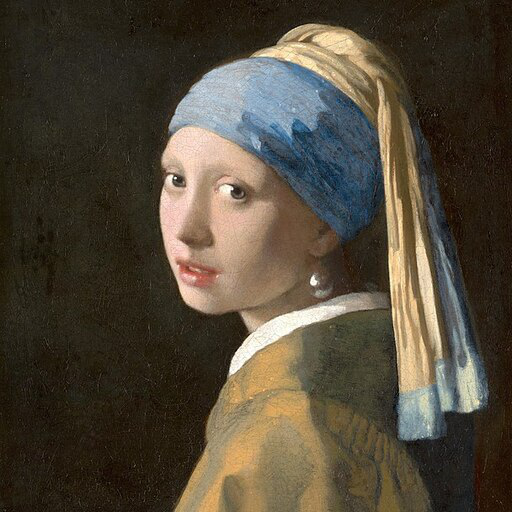

In [2]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image 

# 이미지 불러오기
image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

image

In [3]:
torch.cuda.empty_cache()

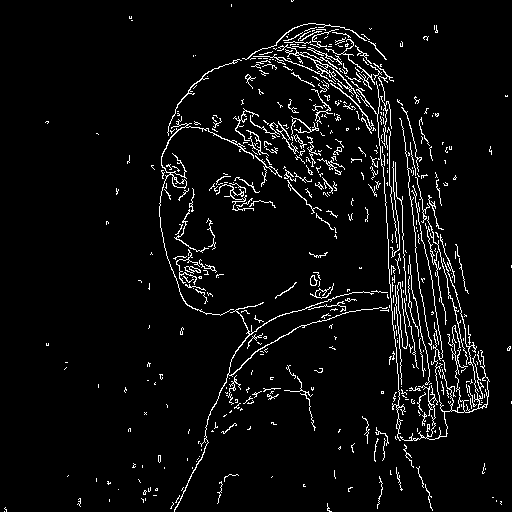

In [4]:
import cv2
from PIL import Image 
import numpy as np

# 이미지를 NumPy 배열로 변환합니다. 
image = np.array(image)

# threshold를 지정합니다. 
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다. 
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다. 

canny_image

In [5]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
torch.cuda.empty_cache()

In [11]:
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다. 
generator = torch.manual_seed(0)  

# 이미지를 생성합니다. 
canny_image = canny_pipe(
    prompt="disco dancer with colorful lights", 
    num_inference_steps=20, 
    generator=generator, 
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다. 
canny_image.save("/aiffel/aiffel/canny_image.png")  

# 생성된 이미지를 출력합니다. 
canny_image

RuntimeError: CUDA out of memory. Tried to allocate 14.00 MiB (GPU 0; 14.76 GiB total capacity; 1.91 GiB already allocated; 12.75 MiB free; 1.96 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다. 
generator = torch.manual_seed(0)  

# 사용자 정의 프롬프트 및 하이퍼파라미터 설정
custom_prompt = "신비로운 숲과 빛나는 생명체"  # 사용자 정의 프롬프트
num_inference_steps = 30  # 추론 단계 수 조정
guidance_scale = 10.0  # 가이던스 스케일 조정

# 이미지 생성
custom_image = canny_pipe(
    prompt=custom_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    generator=generator,
    image=canny_image
).images[0]

# 생성된 이미지 저장
custom_image.save("/aiffel/aiffel/custom_image.png")

# 생성된 이미지 출력
custom_image

In [ ]:
# # controlnet-aux를 설치합니다. Human pose를 검출해주는 controlnet의 보조용 모델입니다.
# !pip install controlnet-aux==0.0.1

In [ ]:
from diffusers.utils import load_image

openpose_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
)
openpose_image

In [ ]:
from controlnet_aux import OpenposeDetector

# 인체의 자세를 검출하는 사전 학습된 ControlNet 불러오기
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 이미지에서 자세 검출
openpose_image = openpose(openpose_image)
openpose_image

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel 

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)


In [ ]:
from diffusers import UniPCMultistepScheduler

openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

# Q. 코드를 작성해 보세요.
# 동일한 이미지를 생성하기 위해 seed를 넣어줍니다. 
generator = torch.manual_seed(0)

#프롬프트를 작성합니다. 
prompt = ("A delicate portrayal of a beautiful girl, bathed in the golden glow of enchanting sunlight, "
            "surrounded by the magic of an ethereal forest. The artwork should capture the essence of her grace, "
            "using soft pastels and earthy tones to create a dreamlike atmosphere. The artist is encouraged to infuse "
            "a poetic and ethereal style, employing high-resolution details to immerse the viewer in this fantasy realm.")
negative_prompt = ("Forest fire, urban setting, artificial lighting, harsh shadows, monochromatic palette, chaotic composition, "
                    "abstract interpretation, distorted features, surreal elements, minimalistic approach, low resolution, pixelation, "
                    "cold atmosphere, heavy texture, unnatural colors.")

images = openpose_image

# 이미지를 생성합니다. 
openpose_image1 = openpose_pipe(prompt=prompt,
                                num_inference_steps=40, 
                                generator=generator, 
                                image=images,
                                guidance_scale=7.5,
                                negative_prompt=negative_prompt).images[0]

# 생성된 이미지를 저장합니다. 
openpose_image1.save("/aiffel/aiffel/canny_image.png")

# 생성된 이미지를 출력합니다. 
openpose_image1




In [ ]:
from diffusers import UniPCMultistepScheduler

# UniPCMultistepScheduler 설정
openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed 지정
generator = torch.manual_seed(0)

# 프롬프트 및 부정적인 프롬프트 작성
prompt = ("A delicate portrayal of a beautiful girl, bathed in the golden glow of enchanting sunlight, "
          "surrounded by the magic of an ethereal forest. The artwork should capture the essence of her grace, "
          "using soft pastels and earthy tones to create a dreamlike atmosphere. The artist is encouraged to infuse "
          "a poetic and ethereal style, employing high-resolution details to immerse the viewer in this fantasy realm.")
negative_prompt = ("Forest fire, urban setting, artificial lighting, harsh shadows, monochromatic palette, chaotic composition, "
                    "abstract interpretation, distorted features, surreal elements, minimalistic approach, low resolution, pixelation, "
                    "cold atmosphere, heavy texture, unnatural colors.")

# 이미지를 생성합니다.
openpose_image_custom = openpose_pipe(
    prompt=prompt,
    num_inference_steps=40,
    generator=generator,
    image=openpose_image,
    guidance_scale=7.5,
    negative_prompt=negative_prompt
).images[0]

# 생성된 이미지를 저장합니다.
openpose_image_custom.save("/aiffel/aiffel/openpose_image_custom.png")

# 생성된 이미지를 출력합니다.
openpose_image_custom



In [ ]:
from diffusers.utils import load_image 
from PIL import Image
import cv2
import numpy as np

# 이미지를 불러오세요.
canny_image = load_image("https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png")
canny_image = np.array(canny_image)

# Threshold를 지정합니다.
low_threshold = 100
high_threshold = 200

# 이미지를 NumPy 배열로 변환합니다.
canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)
canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다.
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다.
canny_image = Image.fromarray(canny_image)

# 생성된 이미지를 출력합니다.
canny_image



In [ ]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

# 이미지를 불러옵니다.
openpose_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png")

# OpenposeDetector를 사용하여 인체 자세를 검출합니다.
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
openpose_image = openpose(openpose_image)

# 검출된 인체 자세가 표시된 이미지를 출력합니다.
openpose_image


In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler  

# Edge Detection과 Openpose, 2개의 전처리기를 controlnets라는 리스트로 만듭니다. 
controlnet_canny = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
controlnet_openpose = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
controlnets = [controlnet_canny, controlnet_openpose]

# 리스트 controlnets를 파이프라인으로 전달합니다. 
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", 
    controlnet=controlnets, 
    torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# 프롬프트를 작성합니다. 
prompt = ("A delicate portrayal of a beautiful girl, bathed in the golden glow of enchanting sunlight, "
          "surrounded by the magic of an ethereal forest. The artwork should capture the essence of her grace, "
          "using soft pastels and earthy tones to create a dreamlike atmosphere. The artist is encouraged to infuse "
          "a poetic and ethereal style, employing high-resolution details to immerse the viewer in this fantasy realm.")
negative_prompt = ("Forest fire, urban setting, artificial lighting, harsh shadows, monochromatic palette, chaotic composition, "
                    "abstract interpretation, distorted features, surreal elements, minimalistic approach, low resolution, pixelation, "
                    "cold atmosphere, heavy texture, unnatural colors.")

# seed를 지정합니다. 
generator = torch.manual_seed(0)

images = [openpose_image, canny_image]

# 이미지를 생성합니다. 
image = pipe(prompt=prompt,
             num_inference_steps=40,
             generator=generator,
             image=images,
             guidance_scale=7.5,
             negative_prompt=negative_prompt).images[0]

# 생성된 이미지를 저장합니다.
image.save("aiffel/aiffel/multi_controlnet_output.png")

# 생성된 이미지를 출력합니다.  
image


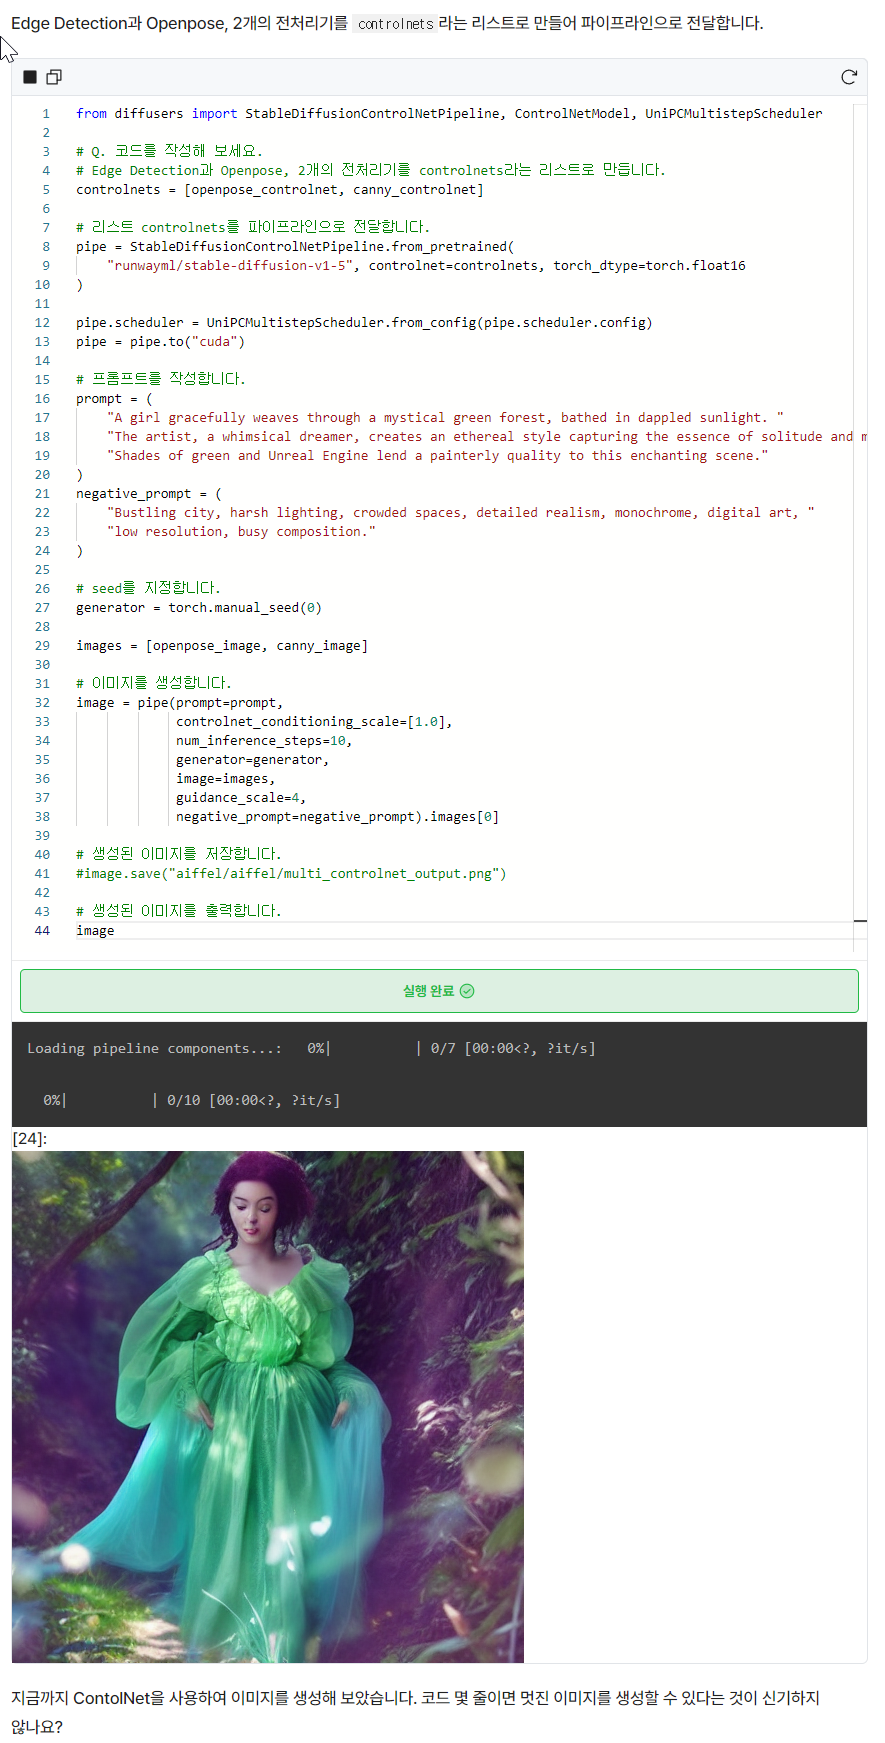


# 회고
## K : 노드를 최대한 이해하고 끝내려고 노력했다. LMS에서는 노드를 끝냈다.
## P : 그러나 노트북 환경에서는 쿠다 메모리 없어서 터지고 노트북 커널 터지는 일이 반복되어 정상적인 학습이 불가능했다. 제시 받은 캐시 삭제 코드는 소용이 없었다. 시간이 너무 낭비되고 비효율적인 학습이 진행되어 아쉬웠다.
## T : 열공한다.
